In [ ]:
! pip install --upgrade pip
!pip install pystan==2.19.1.1 convertdate prophet

     |████████████████████████████████| 2.1 MB 20.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


In [ ]:
import pandas as pd
import os
import tqdm as tq
import string
import statistics as stats
import re
from prophet.diagnostics import cross_validation
pd.set_option('display.max_columns', None) # allows to display all columns of a large dataframe
from prophet import Prophet
import plotly.graph_objs as go

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv('/work/Prophet testing/crimes_and_features.csv')
df = df.loc[df['MSOA code'] == 'E02000001']
df

,Unnamed: 0,Month,MSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,Sum crimes,Median Age,life_exp_m,life_exp_f,life_exp_m65,life_exp_f_65,energy_eff_score,Total annual income
0,0,2015-01,E02000001,102.0,18.0,13.0,21.0,49.0,13.0,142.0,2.0,18.0,7.0,53.0,48.0,12.0,76.0,574,38.15,90.37,90.74,90.74,27.61,72,65400
12602,12602,2015-02,E02000001,91.0,22.0,22.0,22.0,21.0,14.0,141.0,1.0,31.0,1.0,67.0,47.0,10.0,77.0,567,38.15,90.37,90.74,90.74,27.61,72,65400
19803,19803,2015-03,E02000001,96.0,25.0,22.0,14.0,25.0,16.0,168.0,5.0,29.0,2.0,57.0,54.0,8.0,91.0,612,38.15,90.37,90.74,90.74,27.61,72,65400
26409,26409,2015-04,E02000001,73.0,34.0,33.0,18.0,41.0,10.0,125.0,5.0,25.0,6.0,74.0,65.0,8.0,88.0,605,38.15,90.37,90.74,90.74,27.61,72,65400
33609,33609,2015-05,E02000001,81.0,24.0,29.0,13.0,27.0,15.0,129.0,1.0,30.0,5.0,78.0,56.0,17.0,78.0,583,38.15,90.37,90.74,90.74,27.61,72,65400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559467,559467,2021-06,E02000001,101.0,21.0,14.0,29.0,52.0,9.0,67.0,6.0,73.0,11.0,69.0,54.0,20.0,111.0,637,38.15,90.37,90.74,90.74,27.61,72,65400
563317,563317,2021-07,E02000001,111.0,28.0,21.0,30.0,50.0,10.0,94.0,4.0,70.0,16.0,80.0,101.0,15.0,133.0,763,38.15,90.37,90.74,90.74,27.61,72,65400
575050,575050,2021-08,E02000001,77.0,33.0,24.0,36.0,50.0,7.0,124.0,4.0,58.0,13.0,77.0,103.0,23.0,120.0,749,38.15,90.37,90.74,90.74,27.61,72,65400
581244,581244,2021-09,E02000001,97.0,57.0,27.0,25.0,51.0,4.0,153.0,5.0,60.0,21.0,76.0,106.0,31.0,138.0,851,38.15,90.37,90.74,90.74,27.61,72,65400


In [ ]:
string = pd.read_csv('/work/Stringency Index/stringency.csv')

In [ ]:
df2 = df[['Month', 'Sum crimes']]

df2 = df2.rename(columns={"Month":"ds"})
df2 = df2.rename(columns={"Sum crimes":'y'})
df2.astype({'ds': 'datetime64'}).dtypes
df2


,ds,y
0,2015-01,574
12602,2015-02,567
19803,2015-03,612
26409,2015-04,605
33609,2015-05,583
...,...,...
559467,2021-06,637
563317,2021-07,763
575050,2021-08,749
581244,2021-09,851


In [ ]:
m = Prophet()
m.fit(df2)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m = Prophet()
m.add_country_holidays(country_name='GB')
m.fit(df2)
# List the holiday names
m.train_holiday_names

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                                        New Year's Day
1                           New Year Holiday [Scotland]
2                New Year Holiday [Scotland] (Observed)
3                  St. Patrick's Day [Northern Ireland]
4                Battle of the Boyne [Northern Ireland]
5                        Summer Bank Holiday [Scotland]
6                           St. Andrew's Day [Scotland]
7                                         Christmas Day
8                              Christmas Day (Observed)
9                                           Good Friday
10       Easter Monday [England/Wales/Northern Ireland]
11                                              May Day
12                                  Spring Bank Holiday
13    Late Summer Bank Holiday [England/Wales/Northe...
14                                           Boxing Day
15                            New Year's Day (Observed)
16      St. Patrick's Day [Northern Ireland] (Observed)
17                                Boxing Day (Ob

In [ ]:
lockdown = string.head(10)

In [ ]:
string['stringency_index'].unique()

array([ 0.        ,  5.81181818, 11.01413793, 36.63322581, 79.63      ,
       74.22516129, 70.866     , 65.38129032, 67.63612903, 65.56933333,
       67.89129032, 68.33066667, 72.35612903, 86.88516129, 87.4975    ,
       79.74806452, 64.50533333, 61.15483871, 52.87133333, 48.28258065,
       43.98      , 42.034     , 43.71096774, 46.76      , 47.77451613,
       47.14709677, 35.48285714, 29.63      ])

In [ ]:
string = pd.read_csv('/work/Stringency Index/stringency.csv')
string['ds'] = pd.to_datetime(string['Month'])

#Defining types of lockdowns
no_lock = string[string['stringency_index'] == 0]['ds'].to_list()
med_lock = string[(string['stringency_index'] > 0) & (string['stringency_index'] < 50)]['ds'].to_list()
hard_lock = string[(string['stringency_index'] >= 50)]['ds'].to_list()

#Defining prophet 'holidays'
no_lockdown = pd.DataFrame({
    'holiday': 'no_lockdown',
    'ds': no_lock,
    'lower_window': 0,
    'upper_window': 0,
})

med_lockdown = pd.DataFrame({
    'holiday': 'med_lockdown',
    'ds': med_lock,
    'lower_window': 0,
    'upper_window': 0,
})

hard_lockdown = pd.DataFrame({
    'holiday': 'hard_lockdown',
    'ds': hard_lock,
    'lower_window': 0,
    'upper_window': 0,
})

holidays = pd.concat((no_lockdown, med_lockdown, hard_lockdown))

,stringency_index,ds
0,0.000000,2015-01-01
1,0.000000,2015-02-01
2,0.000000,2015-03-01
3,0.000000,2015-04-01
4,0.000000,2015-05-01
...,...,...
82,46.760000,2021-11-01
83,47.774516,2021-12-01
84,47.147097,2022-01-01
85,35.482857,2022-02-01


In [ ]:
no_lock = string[string['stringency_index'] == 0]['ds'].to_list()
med_lock = string[(string['stringency_index'] > 0) & (string['stringency_index'] < 50)]['ds'].to_list()
hard_lock = string[(string['stringency_index'] >= 50)]['ds'].to_list()

In [ ]:
no_lockdown = pd.DataFrame({
    'holiday': 'no_lockdown',
    'ds': no_lock,
    'lower_window': 0,
    'upper_window': 0,
})

med_lockdown = pd.DataFrame({
    'holiday': 'med_lockdown',
    'ds': med_lock,
    'lower_window': 0,
    'upper_window': 0,
})

hard_lockdown = pd.DataFrame({
    'holiday': 'hard_lockdown',
    'ds': hard_lock,
    'lower_window': 0,
    'upper_window': 0,
})

holidays = pd.concat((no_lockdown, med_lockdown, hard_lockdown))

m = Prophet(holidays=holidays)

In [ ]:
m = Prophet(holidays=holidays)
#m.add_country_holidays(country_name='GB')
m.fit(df2)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df2['ds'], y=df2['y'], name='Actual',))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted',))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['holidays'], name='Lockdown strictness',))
fig.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


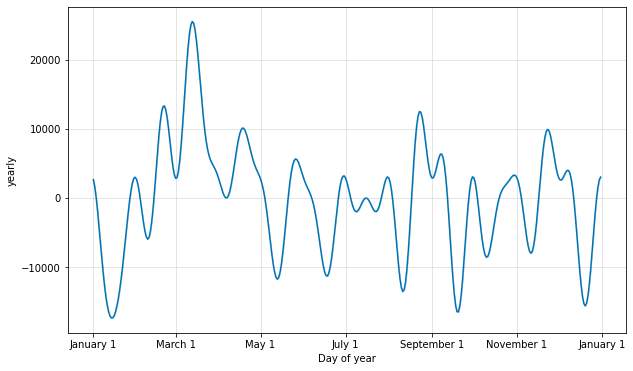

In [ ]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df2)
a = plot_yearly(m)



In [ ]:
getPerformanceMetrics(m).mean()


NameError: name 'getPerformanceMetrics' is not defined

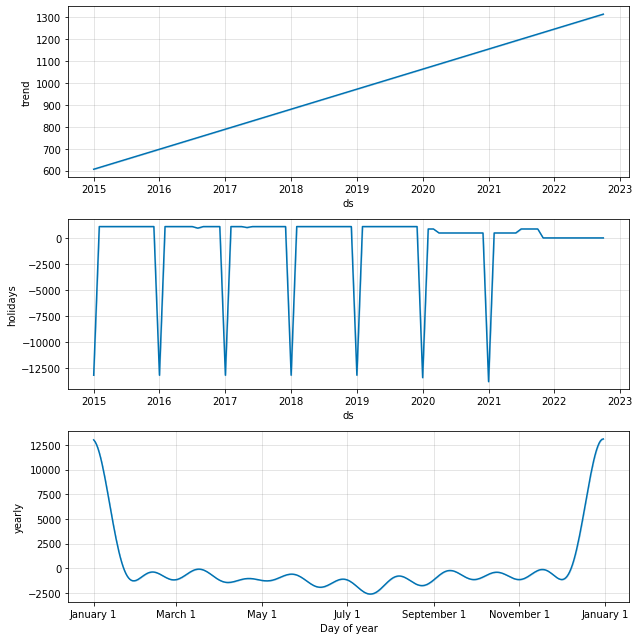

In [ ]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
m = Prophet()
m.add_regressor('Median Age')
m.add_regressor('life_exp_m')
m.add_regressor('life_exp_f')
m.add_regressor('life_exp_m65')
m.add_regressor('life_exp_f_65')
m.add_regressor('energy_eff_score')
m.add_regressor('Total annual income')

m.fit(train)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
77,2021-05-31
78,2021-06-30
79,2021-07-31
80,2021-08-31
81,2021-09-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2021-05-31,787.760689,555.520120,1017.926654
78,2021-06-30,729.424348,496.175802,959.306564
79,2021-07-31,597.537027,355.545333,842.809696
80,2021-08-31,636.787375,402.516846,866.813057
81,2021-09-30,809.209160,561.526375,1045.990685


In [ ]:
fig1 = m.plot(forecast, uncertainty=True)
ax = fig1.gca()
ax.set_title("Current prediction of crime incidents on MSOA: 'E02004914'", size=16)
ax.set_xlabel("Year", size=14)
ax.set_ylabel("Number of crime incidents", size=14);

NameError: name 'forecast' is not defined

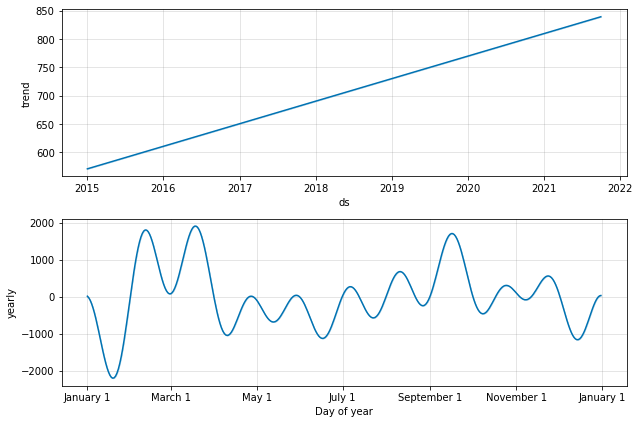

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,571.137397,385.537414,801.103069,571.137397,571.137397,27.997918,27.997918,27.997918,27.997918,27.997918,27.997918,0.0,0.0,0.0,599.135315
1,2015-02-01,574.510845,388.186219,801.836156,574.510845,574.510845,22.055933,22.055933,22.055933,22.055933,22.055933,22.055933,0.0,0.0,0.0,596.566778
2,2015-03-01,577.557831,427.382365,874.714561,577.557831,577.557831,78.057337,78.057337,78.057337,78.057337,78.057337,78.057337,0.0,0.0,0.0,655.615168
3,2015-04-01,580.931279,413.193566,818.908814,580.931279,580.931279,34.314878,34.314878,34.314878,34.314878,34.314878,34.314878,0.0,0.0,0.0,615.246157
4,2015-05-01,584.195906,319.277088,732.911015,584.195906,584.195906,-66.027907,-66.027907,-66.027907,-66.027907,-66.027907,-66.027907,0.0,0.0,0.0,518.167999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2021-05-31,825.828523,614.654194,1038.438072,825.825726,825.831011,13.843736,13.843736,13.843736,13.843736,13.843736,13.843736,0.0,0.0,0.0,839.672259
78,2021-06-30,829.088270,550.525066,963.642309,829.084911,829.091339,-57.299337,-57.299337,-57.299337,-57.299337,-57.299337,-57.299337,0.0,0.0,0.0,771.788933
79,2021-07-31,832.456676,549.171064,967.186327,832.452765,832.460173,-72.080113,-72.080113,-72.080113,-72.080113,-72.080113,-72.080113,0.0,0.0,0.0,760.376563
80,2021-08-31,835.825081,554.171924,973.684529,835.820576,835.829224,-69.827297,-69.827297,-69.827297,-69.827297,-69.827297,-69.827297,0.0,0.0,0.0,765.997784


In [ ]:
df_train = df[df['Month'] <= '2020-10']
df_test = df[df['Month'] > '2020-10']
df_test

,Unnamed: 0,Month,MSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,Sum crimes,Median Age,life_exp_m,life_exp_f,life_exp_m65,life_exp_f_65,energy_eff_score,Total annual income
507325,507325,2020-11,E02000001,83.0,47.0,6.0,12.0,57.0,7.0,45.0,4.0,34.0,17.0,66.0,61.0,10.0,51.0,500,38.15,90.37,90.74,90.74,27.61,72,65400
514358,514358,2020-12,E02000001,71.0,14.0,11.0,24.0,49.0,9.0,48.0,5.0,26.0,10.0,50.0,35.0,13.0,61.0,426,38.15,90.37,90.74,90.74,27.61,72,65400
523643,523643,2021-01,E02000001,65.0,6.0,6.0,10.0,30.0,4.0,27.0,1.0,21.0,3.0,38.0,17.0,7.0,52.0,287,38.15,90.37,90.74,90.74,27.61,72,65400
527267,527267,2021-02,E02000001,60.0,6.0,6.0,10.0,29.0,7.0,12.0,4.0,20.0,9.0,31.0,33.0,8.0,39.0,274,38.15,90.37,90.74,90.74,27.61,72,65400
534772,534772,2021-03,E02000001,62.0,11.0,7.0,19.0,54.0,8.0,20.0,3.0,47.0,3.0,39.0,28.0,13.0,71.0,385,38.15,90.37,90.74,90.74,27.61,72,65400
545059,545059,2021-04,E02000001,71.0,25.0,16.0,16.0,43.0,2.0,33.0,2.0,31.0,15.0,43.0,35.0,7.0,59.0,398,38.15,90.37,90.74,90.74,27.61,72,65400
547276,547276,2021-05,E02000001,79.0,26.0,14.0,10.0,44.0,4.0,55.0,3.0,34.0,8.0,47.0,69.0,12.0,63.0,468,38.15,90.37,90.74,90.74,27.61,72,65400
559467,559467,2021-06,E02000001,101.0,21.0,14.0,29.0,52.0,9.0,67.0,6.0,73.0,11.0,69.0,54.0,20.0,111.0,637,38.15,90.37,90.74,90.74,27.61,72,65400
563317,563317,2021-07,E02000001,111.0,28.0,21.0,30.0,50.0,10.0,94.0,4.0,70.0,16.0,80.0,101.0,15.0,133.0,763,38.15,90.37,90.74,90.74,27.61,72,65400
575050,575050,2021-08,E02000001,77.0,33.0,24.0,36.0,50.0,7.0,124.0,4.0,58.0,13.0,77.0,103.0,23.0,120.0,749,38.15,90.37,90.74,90.74,27.61,72,65400


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

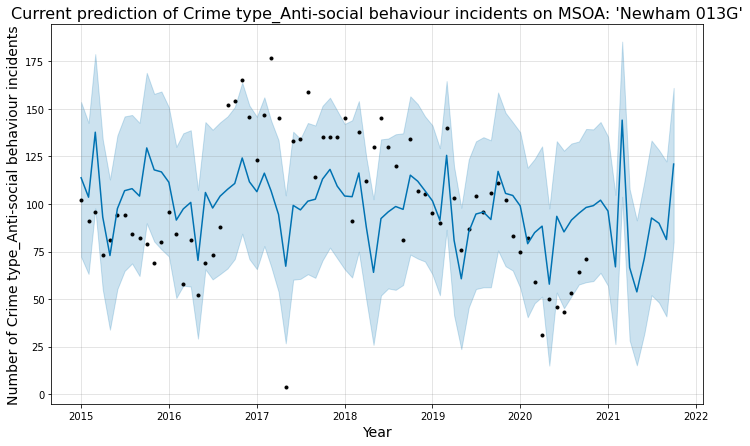

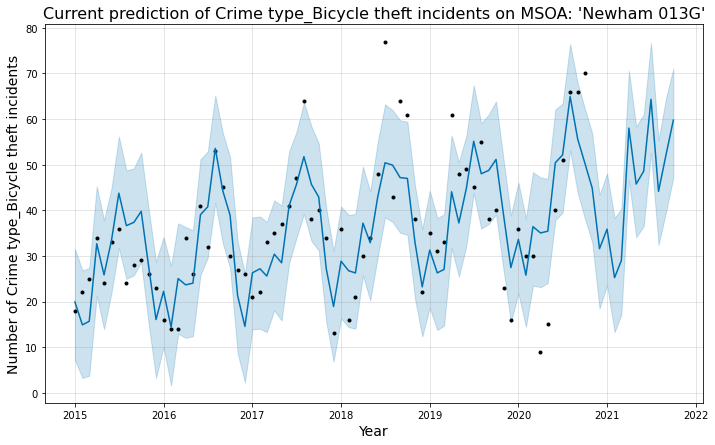

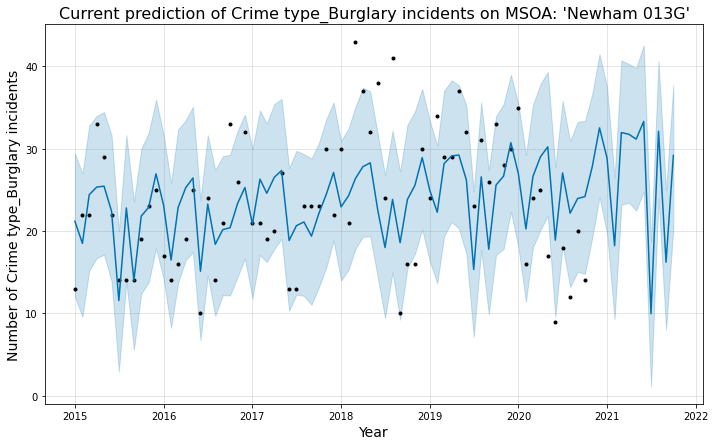

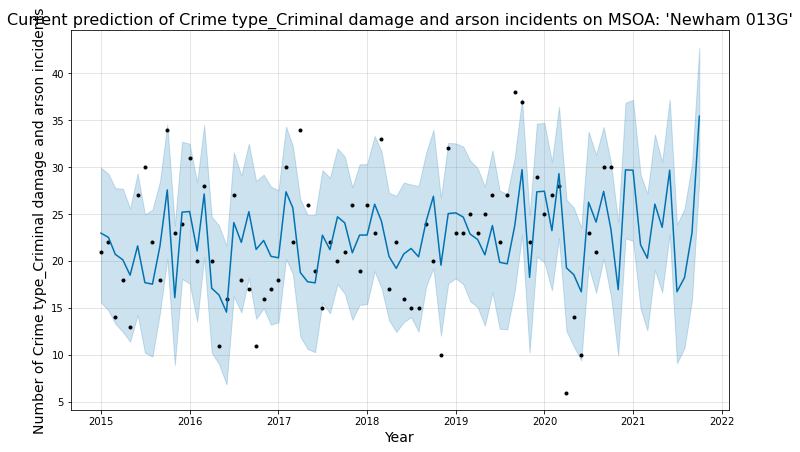

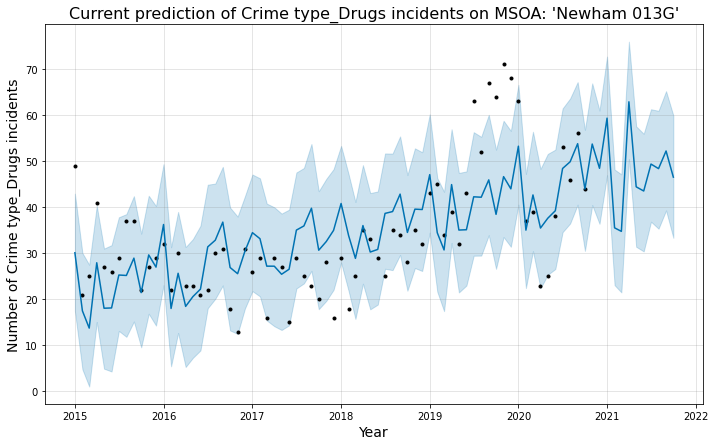

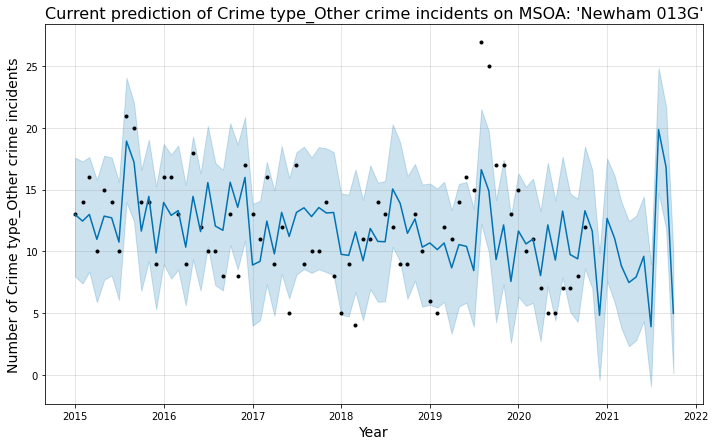

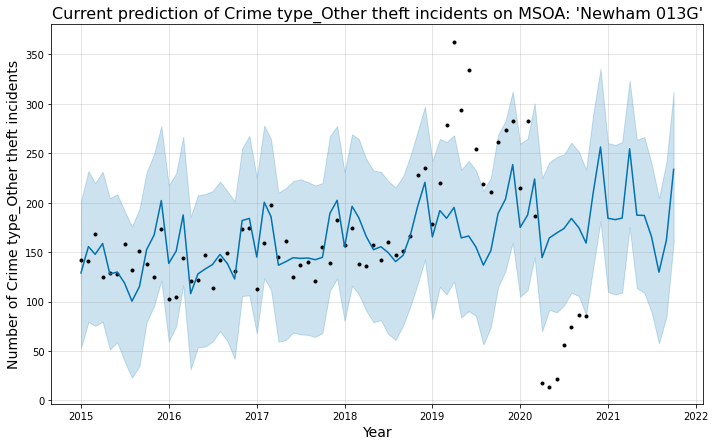

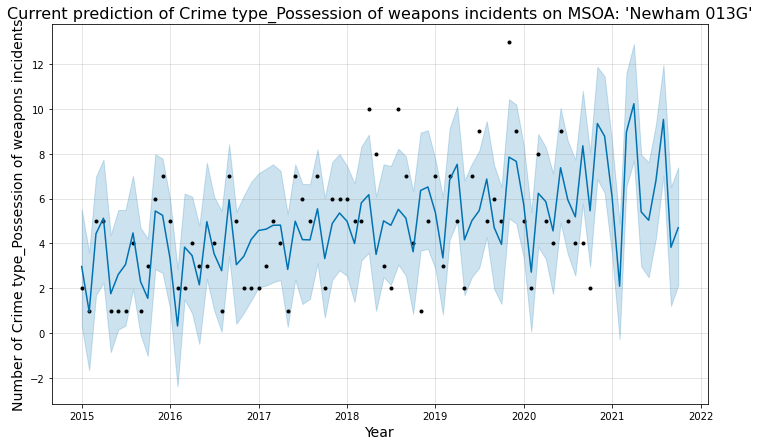

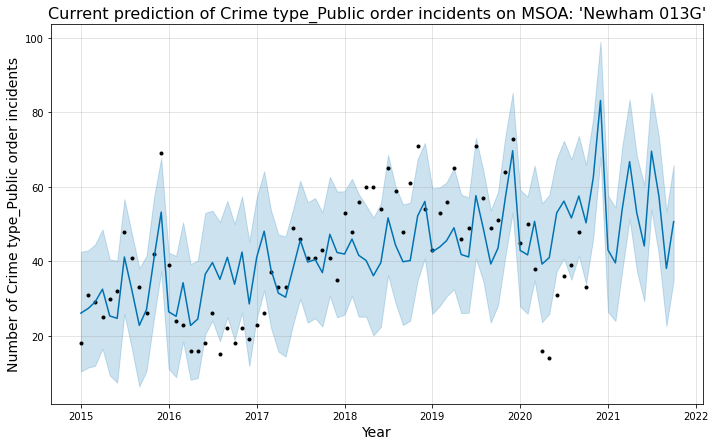

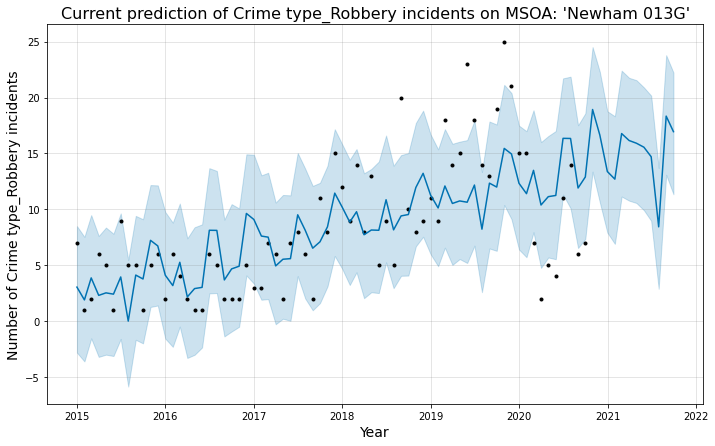

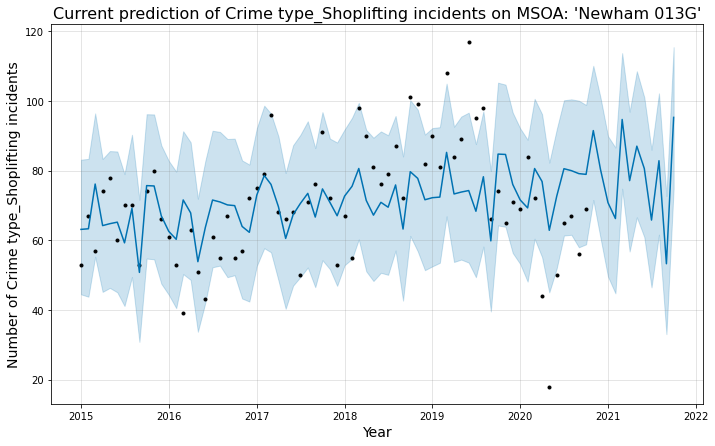

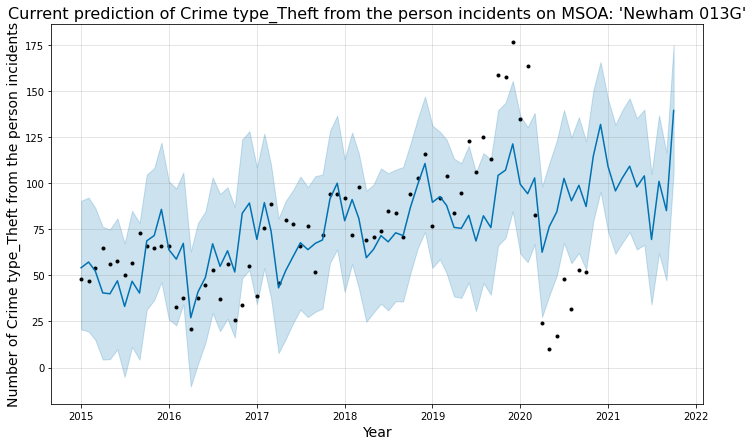

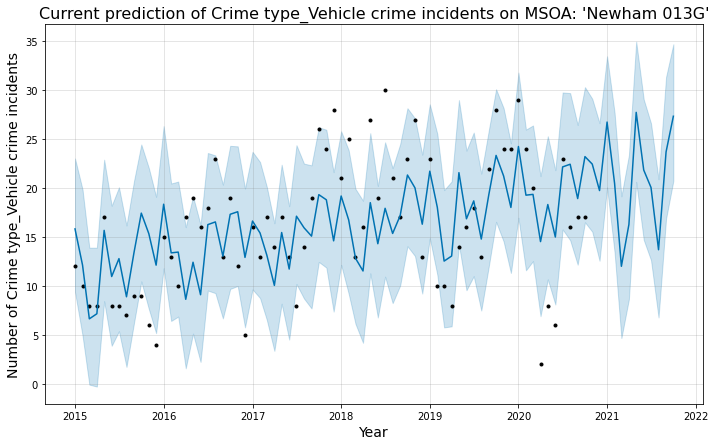

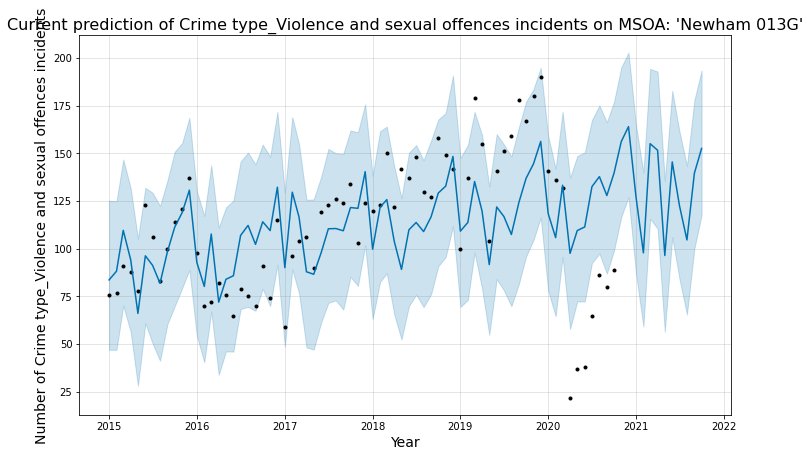

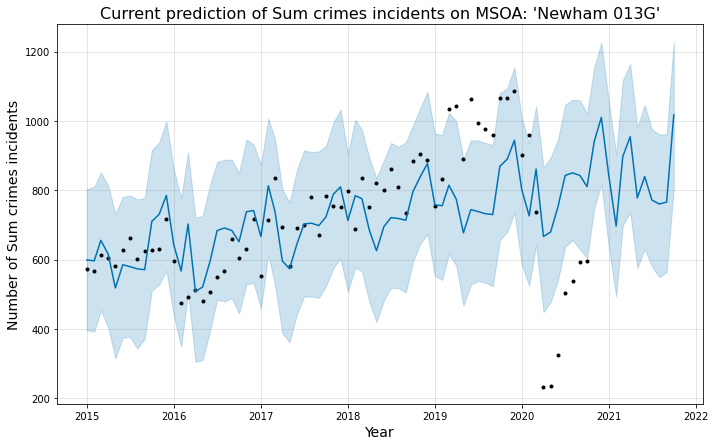

In [ ]:
#This loops over every crime type in the dataset and makes seperate predicitons about the amount of that type
#one year ahead of time, per month and prints a forecasting figure as result
i = 3
forecasts = []
crime_types = []
while i<=17: #replace 3 by once dataset implemented df.count(axis='columns')
     

    df_train2 = df_train.iloc[:, [1, i]]
    crime_type = df_train2.columns.values[1]
    df_train2.columns.values[0] = "ds"
    df_train2.columns.values[1] = "y"
    df_train2.astype({'ds': 'datetime64[ns]'}).dtypes
    crime_types.append(crime_type)
    m = Prophet()
    m.fit(df_train2)

    future = m.make_future_dataframe(periods=12, freq='M')

    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    forecasts.append(forecast)

    fig1 = m.plot(forecast)
    ax = fig1.gca()
    ax.set_title("Current prediction of " + crime_type + " incidents on MSOA: 'Newham 013G'", size=16)
    ax.set_xlabel("Year", size=14)
    ax.set_ylabel("Number of " + crime_type + " incidents", size=14);
    i +=1


In [ ]:
j=0
while j < len(forecasts):
    i=0
    error = []
    forecast = forecasts[j]
    while i<len(test):
        x = forecast.iloc[i]["trend"]
        y = df_test.iloc[i][j+2]
        error.append(abs(y-x))
        i += 1
    MAE = sum(error)/len(error)
    print("MAE for", crime_types[j] ,"is", MAE)
    j +=1


MAE for Crime type_Anti-social behaviour is 21.33656473650429
MAE for Crime type_Bicycle theft is 12.131298391012892
MAE for Crime type_Burglary is 7.844469864734826
MAE for Crime type_Criminal damage and arson is 9.235142601665617
MAE for Crime type_Drugs is 23.96344006828116
MAE for Crime type_Other crime is 7.82171627020676
MAE for Crime type_Other theft is 71.24042786713359
MAE for Crime type_Possession of weapons is 1.8393175216244293
MAE for Crime type_Public order is 21.225310020389458
MAE for Crime type_Robbery is 8.2391090647032
MAE for Crime type_Shoplifting is 15.951258446485012
MAE for Crime type_Theft from the person is 28.255615585604783
MAE for Crime type_Vehicle crime is 4.702081070097003
MAE for Crime type_Violence and sexual offences is 38.194377343464936
MAE for Sum crimes is 185.533354166541


In [ ]:
j=0
while j< len(forecasts):
    i=0
    error = []
    while i<len(test):
        x = forecast.iloc[i]["trend"]
        y = df_test.iloc[i][j+2]
        error.append((y-x)**2)
        i += 1
    MSE = sum(error)/len(error)
    print("MSE for", crime_types[j] ,"is", MSE)
    j +=1

MSE for Crime type_Anti-social behaviour is 258734.64344257585
MSE for Crime type_Bicycle theft is 317165.15645762155
MSE for Crime type_Burglary is 330770.223126366
MSE for Crime type_Criminal damage and arson is 321652.2996433393
MSE for Crime type_Drugs is 294367.1035689232
MSE for Crime type_Other crime is 339045.29881668335
MSE for Crime type_Other theft is 271605.850661292
MSE for Crime type_Possession of weapons is 342639.97324748576
MSE for Crime type_Public order is 295371.77704976784
MSE for Crime type_Robbery is 334111.93072202854
MSE for Crime type_Shoplifting is 282750.7680074177
MSE for Crime type_Theft from the person is 277812.35130627954
MSE for Crime type_Vehicle crime is 330512.7680840598
MSE for Crime type_Violence and sexual offences is 250017.07664096847
MSE for Sum crimes is 41269.63760132087


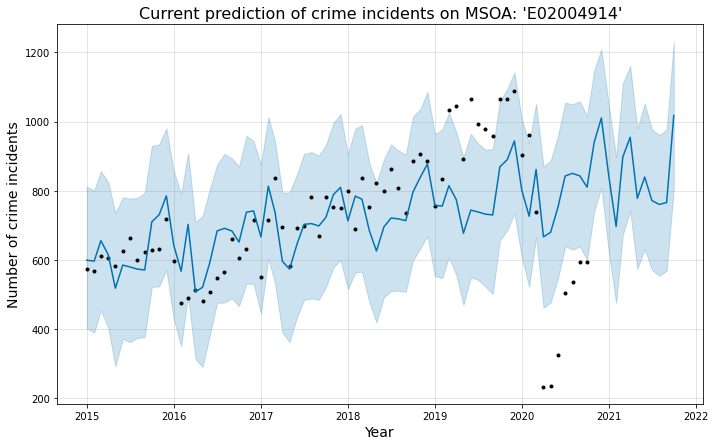

In [ ]:
fig1_m = m.plot(forecast)
ax = fig1_m.gca()
ax.set_title("Current prediction of crime incidents on MSOA: 'E02004914'", size=16)
ax.set_xlabel("Year", size=14)
ax.set_ylabel("Number of crime incidents", size=14);

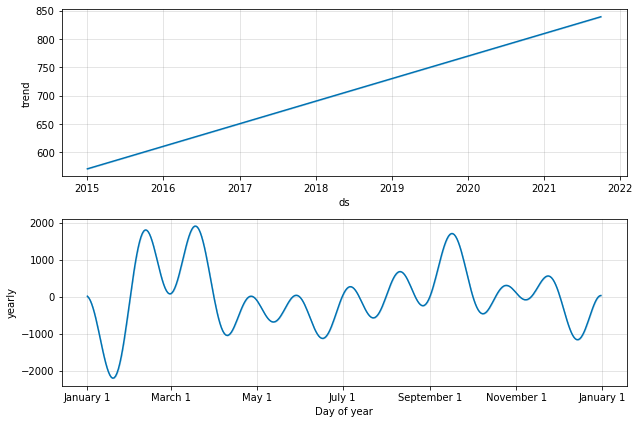

In [ ]:
fig2_m = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
print (len(train),len(test))

70 12


In [ ]:
# Initial training period.
initial= len(train)
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= len(test)
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 30*12
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)
# Performance Metrics of fb_cv
performance_metrics(fb_cv)


NameError: name 'train' is not defined

In [ ]:
fb_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-11-01,7746.171698,7746.171697,7746.171699,632,2015-10-28
1,2015-12-01,-4160.993696,-4160.993698,-4160.993694,718,2015-10-28
2,2016-01-01,2694.812279,2694.812275,2694.812282,597,2015-10-28
3,2016-02-01,2270.309650,2270.309644,2270.309655,476,2015-10-28
4,2016-03-01,2494.676991,2494.676983,2494.676999,491,2015-10-28
5,2016-04-01,2697.061633,2697.061622,2697.061643,512,2015-10-28
6,2016-05-01,1600.123600,1600.123586,1600.123614,481,2015-10-28
7,2016-06-01,2408.835787,2408.835771,2408.835804,507,2015-10-28
8,2016-07-01,2802.553697,2802.553678,2802.553716,549,2015-10-28
9,2016-08-01,3850.893340,3850.893318,3850.893363,566,2015-10-28


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,12 days,4.251610e+06,2061.943302,816.849855,1.356721,0.158218,0.535194,0.313433


In [ ]:
df_cv = cross_validation(train, initial='730 days', period='180 days', horizon = '365 days')

AttributeError: 'DataFrame' object has no attribute 'history'

In [ ]:
#MAE attempt
i=0
error = []
while i<len(test):
    x = forecast.iloc[i]["trend"]
    y = test.iloc[i]["y"]
    error.append(abs(y-x))
    i += 1
MAE = sum(error)/len(error)
print(MAE)


185.533354166541


In [ ]:
#MSE attempt
i=0
error = []
while i<len(test):
    x = forecast.iloc[i]["trend"]
    y = test.iloc[i]["y"]
    error.append((y-x)**2)
    i += 1
MSE = sum(error)/len(error)
print(MSE)

41269.63760132087


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40789b9a-1c62-45b9-9d9c-b1a39ebe3dfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>